# Example of using scalers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."))
from fdi_flow.preprocessing import segmenters

## Generate data

In [2]:
n_points = 10
time = np.linspace(0, 10, n_points)
data1 = np.arange(n_points)
data2 = np.arange(100, 100 + n_points)
np_data = np.vstack([data1, data2])

df = pd.DataFrame({
    'sensor1': data1,
    'sensor2': data2}, index=time)

## TimeSeriesSegmenter

In [5]:
segmenter = segmenters.TimeSeriesSegmenter(window_size=4, step=1, axis=0)
np_segments = segmenter.segment(np_data)
for segment in np_segments:
    print(segment)

[[  0   1   2   3]
 [100 101 102 103]]
[[  1   2   3   4]
 [101 102 103 104]]
[[  2   3   4   5]
 [102 103 104 105]]
[[  3   4   5   6]
 [103 104 105 106]]
[[  4   5   6   7]
 [104 105 106 107]]
[[  5   6   7   8]
 [105 106 107 108]]
[[  6   7   8   9]
 [106 107 108 109]]


In [12]:
segmenter = segmenters.TimeSeriesSegmenter(window_size=4, step=1, axis=1)
df_segments = segmenter.segment(df)
df_segments[1]

,sensor1,sensor2
1.111111,1,101
2.222222,2,102
3.333333,3,103
4.444444,4,104


## TimeSeriesResampler

Numpy array resampling (axis=0):
Original shape: (2, 100)
Resampled shape: (2, 50)

DataFrame resampling (axis=1):
Original shape: (100, 2)
Resampled shape: (50, 2)


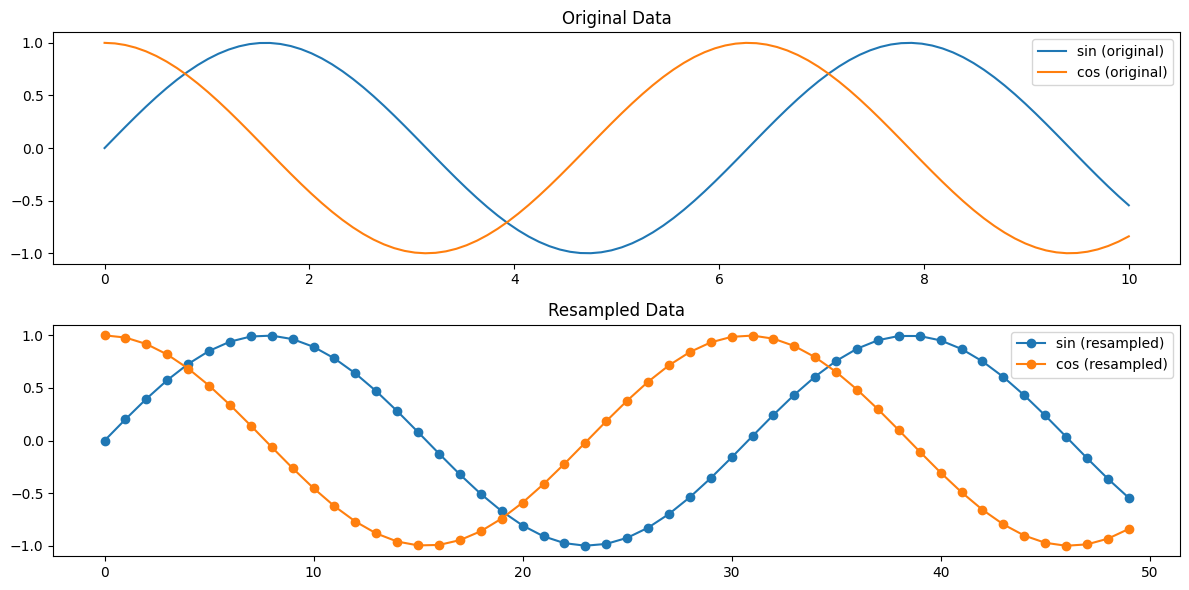

In [3]:
n_points = 100
time = np.linspace(0, 10, n_points)
data1 = np.sin(time)
data2 = np.cos(time)

np_data = np.vstack([data1, data2])  

resampler = segmenters.TimeSeriesResampler(target_size=50, method='cubic', axis=0)
np_resampled = resampler.resample(np_data)

print("Numpy array resampling (axis=0):")
print(f"Original shape: {np_data.shape}")
print(f"Resampled shape: {np_resampled.shape}\n")  

df = pd.DataFrame({
    'sin': data1,
    'cos': data2
}, index=time)

resampler = segmenters.TimeSeriesResampler(target_size=50, method='linear')
df_resampled = resampler.resample(df)

print("DataFrame resampling (axis=1):")
print(f"Original shape: {df.shape}")
print(f"Resampled shape: {df_resampled.shape}")  


plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df.index, df['sin'], label='sin (original)')
plt.plot(df.index, df['cos'], label='cos (original)')
plt.title("Original Data")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df_resampled.index, df_resampled['sin'], 'o-', label='sin (resampled)')
plt.plot(df_resampled.index, df_resampled['cos'], 'o-', label='cos (resampled)')
plt.title("Resampled Data")
plt.legend()

plt.tight_layout()

## SplineUpsampler

In [3]:
data = [1.0, 2.0, 1.5, 3.0, 2.5]

upsampler = segmenters.SplineUpsampler(target_size=10, spline_degree=3)
upsampled_data = upsampler.upsample(data)

print(upsampled_data)

[1.         1.97370828 2.06127115 1.7345679  1.46547782 1.70530407
 2.43209877 3.15066301 3.34522176 2.5       ]


## SplineUpsampler

Numpy array upsampling (axis=0):
Original shape: (2, 20)
Upsampled shape: (2, 100)

DataFrame upsampling (axis=1):
Original shape: (20, 2)
Upsampled shape: (100, 2)


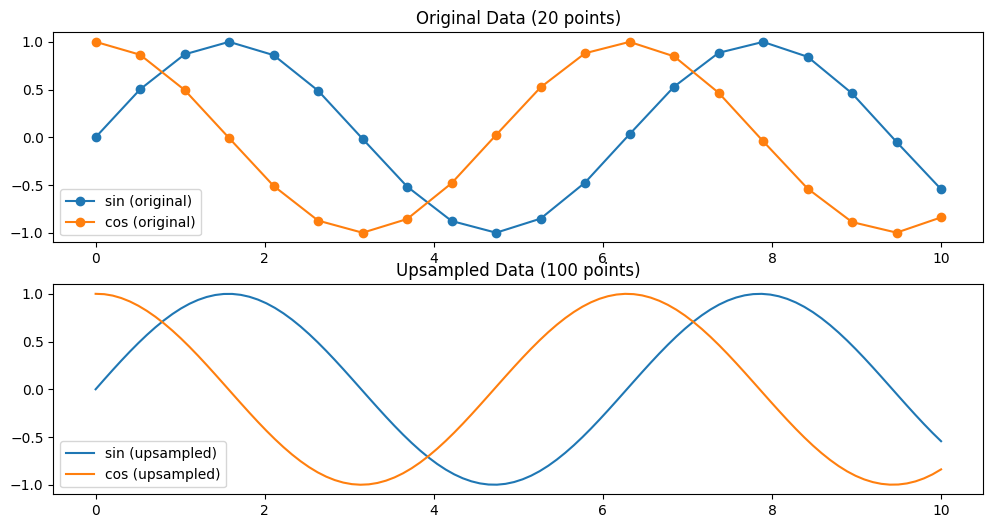

In [3]:
n_points = 20
time = np.linspace(0, 10, n_points)
data1 = np.sin(time)
data2 = np.cos(time)

# 1. Пример с numpy array (2 ряда × 20 точек)
np_data = np.vstack([data1, data2])  # Форма (2, 20)

# Апсемплинг по строкам (axis=0 - каждый ряд это временной ряд)
upsampler = segmenters.SplineUpsampler(target_size=100, spline_degree=3, axis=0)
np_upsampled = upsampler.upsample(np_data)

print("Numpy array upsampling (axis=0):")
print(f"Original shape: {np_data.shape}")
print(f"Upsampled shape: {np_upsampled.shape}\n")  # (2, 100)

# 2. Пример с DataFrame (20 точек × 2 ряда)
df = pd.DataFrame({
    'sin': data1,
    'cos': data2
}, index=time)

# Апсемплинг по времени (axis=1 - по умолчанию)
upsampler = segmenters.SplineUpsampler(target_size=100, spline_degree=3)
df_upsampled = upsampler.upsample(df)

print("DataFrame upsampling (axis=1):")
print(f"Original shape: {df.shape}")
print(f"Upsampled shape: {df_upsampled.shape}")  # (100, 2)

# 3. Визуализация
plt.figure(figsize=(12, 6))

# Оригинальные данные
plt.subplot(2, 1, 1)
plt.plot(df.index, df['sin'], 'o-', label='sin (original)')
plt.plot(df.index, df['cos'], 'o-', label='cos (original)')
plt.title("Original Data (20 points)")
plt.legend()

# Апсемплированные данные
plt.subplot(2, 1, 2)
plt.plot(df_upsampled.index, df_upsampled['sin'], label='sin (upsampled)')
plt.plot(df_upsampled.index, df_upsampled['cos'], label='cos (upsampled)')
plt.title("Upsampled Data (100 points)")
plt.legend()


## FailureEncoder

Numpy array encoding (axis=0):
Encoded values: [2 0 1]

DataFrame encoding (axis=1):
sensor1    2
sensor2    0
sensor3    1
dtype: int64


(0.0, 3.0)

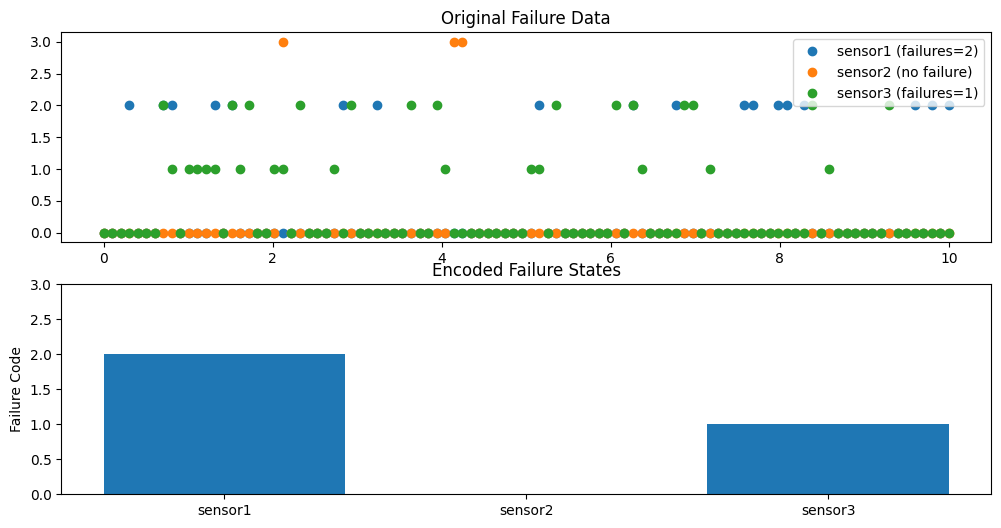

In [2]:
n_points = 100
time = np.linspace(0, 10, n_points)

# Data with failures:
# - sensor1: 20% failures code 2
# - sensor2: 5% failures code 3 (below threshold)
# - sensor3: 30% failures code 1 and 2 (mode=1)
data1 = np.where(np.random.random(n_points) < 0.2, 2, 0)
data2 = np.where(np.random.random(n_points) < 0.05, 3, 0)
data3 = np.where(np.random.random(n_points) < 0.3, 
                np.random.choice([1, 2], size=n_points), 0)

np_data = np.vstack([data1, data2, data3])  # Форма (3, 100)

encoder = segmenters.FailureEncoder(failure_threshold=10.0, axis=0)
np_encoded = encoder.encode(np_data)

print("Numpy array encoding (axis=0):")
print(f"Encoded values: {np_encoded}")  # [2, 0, 1]

df = pd.DataFrame({
    'sensor1': data1,
    'sensor2': data2,
    'sensor3': data3
}, index=time)

encoder = segmenters.FailureEncoder(failure_threshold=10.0)
df_encoded = encoder.encode(df)

print("\nDataFrame encoding (axis=1):")
print(df_encoded)
# sensor1    2
# sensor2    0
# sensor3    1
# dtype: int64

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df.index, df['sensor1'], 'o', label='sensor1 (failures=2)')
plt.plot(df.index, df['sensor2'], 'o', label='sensor2 (no failure)')
plt.plot(df.index, df['sensor3'], 'o', label='sensor3 (failures=1)')
plt.title("Original Failure Data")
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(['sensor1', 'sensor2', 'sensor3'], 
        [df_encoded['sensor1'], df_encoded['sensor2'], df_encoded['sensor3']])
plt.title("Encoded Failure States")
plt.ylabel("Failure Code")
plt.ylim(0, 3)